In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from pathlib import Path

In [7]:
data_dir = Path('../data/raw')
nc_data_dir = data_dir / "OUT.nc"

# setting my own path to the data
nc_data_dir = Path('/Volumes/Lees_Extend/data/ea_data/OUT.nc')

ds = xr.open_dataset(nc_data_dir)
ds

<xarray.Dataset>
Dimensions:                 (lat: 404, lon: 316, time: 85)
Coordinates:
  * time                    (time) datetime64[ns] 2010-01-01 ... 2017-01-01
  * lon                     (lon) float32 32.524994 32.574997 ... 48.274994
  * lat                     (lat) float32 -4.9750023 -4.925003 ... 15.174995
    month                   (time) int64 ...
Data variables:
    lst_day                 (time, lat, lon) float64 ...
    lst_night               (time, lat, lon) float64 ...
    lst_mean                (time, lat, lon) float64 ...
    evaporation             (time, lat, lon) float64 ...
    baresoil_evaporation    (time, lat, lon) float64 ...
    potential_evaporation   (time, lat, lon) float64 ...
    transpiration           (time, lat, lon) float64 ...
    surface_soil_moisture   (time, lat, lon) float64 ...
    rootzone_soil_moisture  (time, lat, lon) float64 ...
    sm                      (time, lat, lon) float64 ...
    precip                  (time, lat, lon) float6

## The Precipitation Values are upside down! (`lat` is inverted)

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 0.98, 'Mean over time of the ROI for different variables')

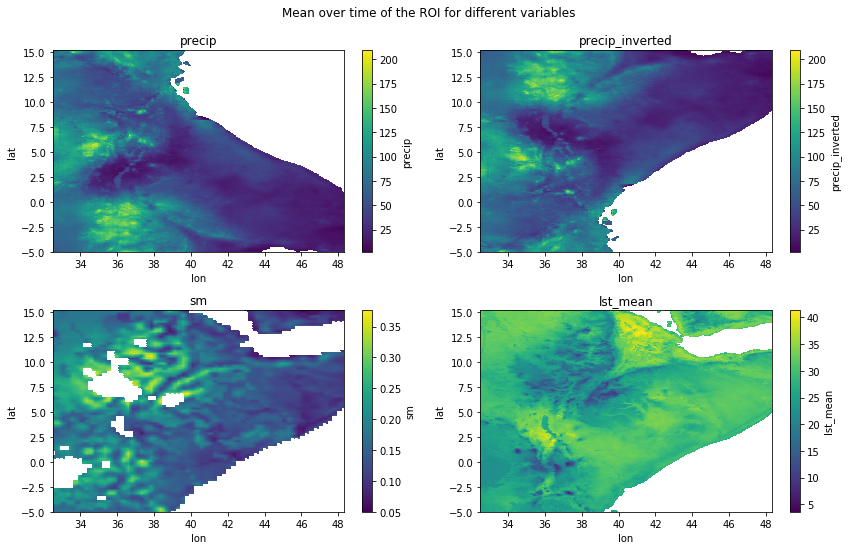

In [33]:
fig,axs = plt.subplots(2,2,figsize=(12,8))

raw_precip = ds.precip.mean(dim='time')
reset_precip = xr.DataArray(
    ds.precip.values[:,::-1,:], 
    coords=[ds.time, ds.lat, ds.lon], dims=['time','lat','lon'],
    name='precip_inverted'
).mean(dim='time')
raw_sm = ds.sm.mean(dim='time')
raw_lst = ds.lst_mean.where(ds.lst_mean < 100).mean(dim='time')

for ix, da in enumerate([raw_precip, reset_precip, raw_sm, raw_lst]):
    ax_ix = np.unravel_index(ix, (2,2))
    ax = axs[ax_ix]
    da.plot(ax=ax)
    ax.set_title(da.name)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Mean over time of the ROI for different variables')

In [48]:
dims = [dim for dim in ds.dims.keys()] + ['month']
variables = [var_ for var_ in ds.variables.keys() if var_ not in dims]
lst_vars = [var_ for var_ in variables if 'lst' in var_]
raw_vars = [var_ for var_ in variables if var_ not in ["drought_spi","drought_spei","drought_ndvi"]]

for lst_var in lst_vars:
    ds[lst_var] = ds[lst_var].where(ds.lst_mean < 100)

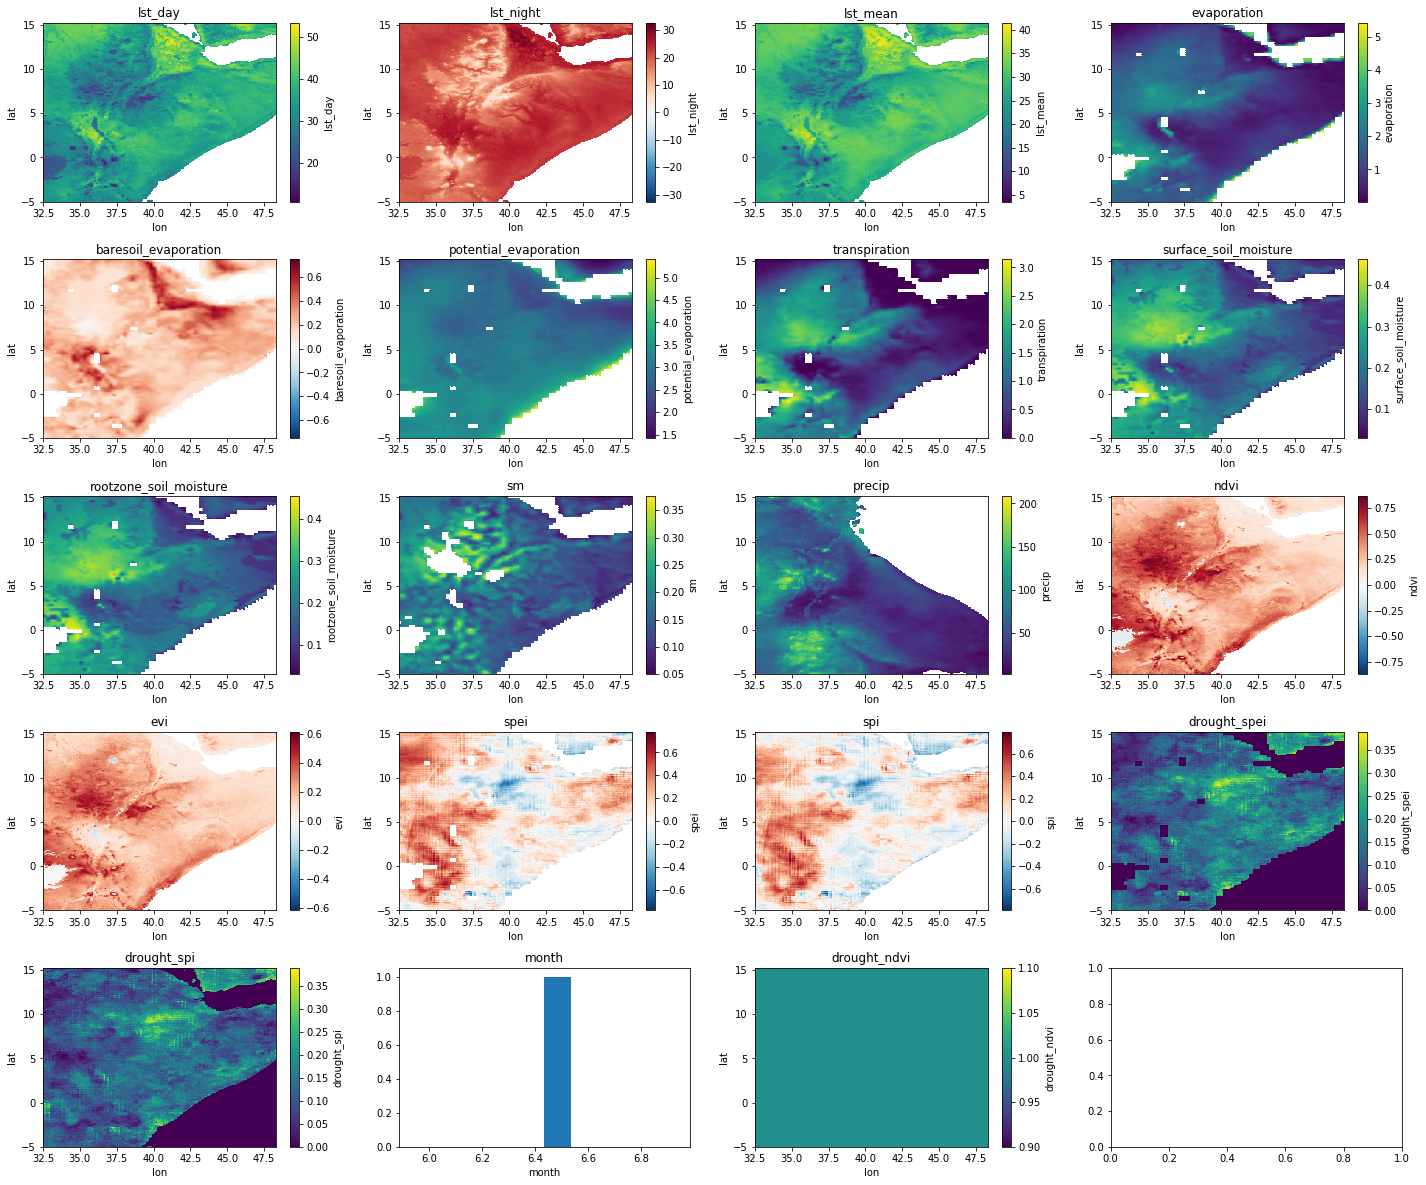

In [47]:
fig,axs = plt.subplots(5,4, figsize=(20,18));

for ix, var in enumerate(variables):
    ax_ix = np.unravel_index(ix, (5,4))
    ax = axs[ax_ix]
    da = ds[var]
    da.mean(dim='time').plot(ax=ax)
    ax.set_title(da.name)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [57]:
da = ds['evi']
da.groupby('time.month').mean(dim=['time']).max(dim=['lat','lon']) #,'lat','lon'


<xarray.DataArray 'evi' (month: 12)>
array([0.6957  , 0.686335, 0.701871, 0.683871, 0.666043, 0.6691  , 0.677141,
       0.690869, 0.657525, 0.633567, 0.6274  , 0.631071])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
fig,axs = plt.subplots(4,4, figsize=(20,18));

for ix, var in enumerate(raw_vars):
    ax_ix = np.unravel_index(ix, (5,4))
    ax = axs[ax_ix]
    da = ds[var]

